<a href="https://colab.research.google.com/github/AkkiNikumbh/ML-EXPERIMENTS/blob/main/Akash_Singh_23CS036_Experiment_3(Logistic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 15.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:


df = pd.read_csv('/content/spam (1).csv') #write your own file path
df.head()



,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape


(5572, 2)

In [ ]:
#check null values
df.isnull()

,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [ ]:
#find duplicates and drop (inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
#now it should be false
df.duplicated().any()


np.False_

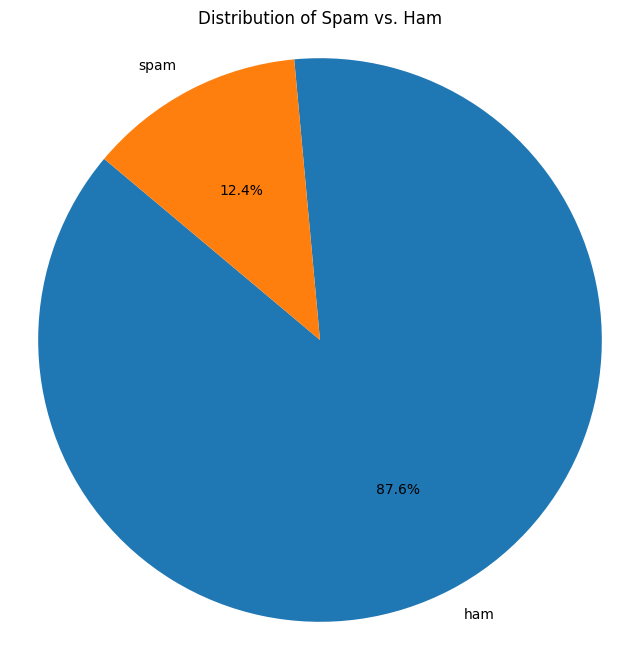

In [ ]:
# Calculate the count of each label
category_counts = df['Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam vs. Ham')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#TEXT VISUALIZATION

- Iterate through unique categories: This loop iterates through each unique category in the 'Category' column of the DataFrame df.¶
- Filter the DataFrame for the current category: Inside the loop, the code filters the DataFrame df to create a new DataFrame filtered_df containing only the rows where the 'Category' column matches the current category.
- Concatenate all text data for the current category: The code then concatenates all the text data from the 'Message' column of filtered_df into a single string variable named text.
- Generate word cloud: Using the concatenated text data (text), the code generates a word cloud using the WordCloud module. The word cloud is configured to have a width of 800 pixels, a height of 400 pixels, and a white background.
- Plot the word cloud: Finally, the code plots the generated word cloud using Matplotlib. Each word's size in the word cloud is proportional to its frequency in the concatenated text data. The title of each word cloud plot includes the current category being processed. The plt.axis('off') command is used to hide the axes of the plot.
This process repeats for each unique category, generating a separate word cloud for each category based on the text data associated with that category.

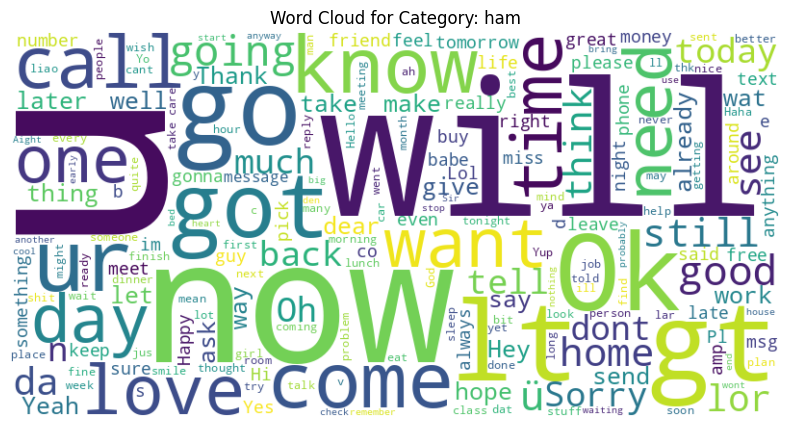

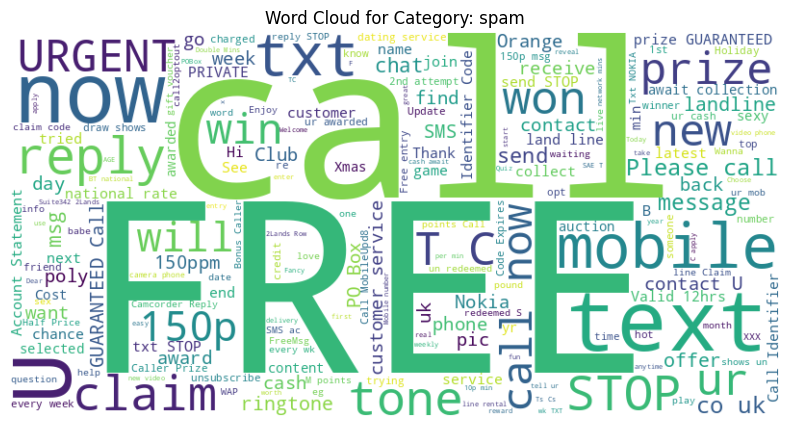

In [ ]:
# Iterate through unique categories
for category in df['Category'].unique():
    # Filter the DataFrame for the current category
    filtered_df = df[df['Category'] == category]

    # Concatenate all text data for the current category
    text = ' '.join(filtered_df['Message'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

In [ ]:
le = LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#Text Preprocessing

1. Lower Casing¶
2. Remove Extra White Spaces
3. Remove HTML Tags
4. Remove URLs
5. Remove Punctuations
6. Remove Special Characters
7. Remove Numeric Values
8. Remove Non-alpha Numeric

10. Handling StopWords¶
11. Handling Emojis
12. Stemming



In [ ]:
# Convert 'Text' column to lowercase
df['Message'] = df['Message'].str.lower()
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
# Remove extra white spaces from the 'Text' column
import re

df['Message'] = df['Message'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
# Function to remove HTML tags from text
def remove_html_tags(text):
    pass

# Remove HTML tags from 'Text' column
df['Message'] = df['Message'].apply(remove_html_tags)

In [ ]:
# Define a function to remove URLs using regular expressions
def remove_urls(text):
    pass
# Apply the function to the 'Text' column
df['Message'] = df['Message'].apply(remove_urls)

In [ ]:
def remove_special_characters(text):
    # Define the pattern to match special characters
    pass
# Apply the function to the 'Message' column
df['Message'] = df['Message'].apply(remove_special_characters)

In [ ]:
# Function to remove numeric values from text
def remove_numeric(text):
    pass
# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_numeric)

In [ ]:
# Define a function to remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    pass
# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_non_alphanumeric)

In [ ]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [ ]:
# Function to replace chat words with their full forms
def replace_chat_words(text):
    pass
# Apply replace_chat_words function to 'Text' column
df['Message'] = df['Message'].apply(replace_chat_words)

In [54]:
# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
df['Message'] = df['Message'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
# Function to remove emojis from text
def remove_emojis(Message):
    return emoji.demojize(Message)

# Apply remove_emojis function to 'Text' column
df['Message'] = df['Message'].apply(remove_emojis)


In [51]:
# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming
df['Message_stemmed'] = df['Message'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))
df.head()


,Category,Message,Message_stemmed
0,0,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. avail onli in b..."
1,0,Ok lar... Joking wif u oni...,ok lar... joke wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say so earli hor... u c alreadi then say...
4,0,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goe to usf, he live aroun..."


In [52]:
#Convert text to numbers using bag of words
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(df['Message_stemmed']).toarray()
y = df['Category']


In [55]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

#Solve this problem using Logistic Regression(using numpy from scratch)

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [37]:
# 1. Load dataset
df = pd.read_csv("/content/spam (1).csv")
print(df.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [38]:
# Encode target (spam = 1, ham = 0)
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

In [45]:
# Logistic Regression (Scratch)
class LogisticRegressionScratch:
    def __init__(self, lr=0.1, epochs=500, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.losses = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.W = np.zeros((self.n, 1))
        self.b = 0

        for i in range(self.epochs):
            # Forward
            z = np.dot(X, self.W) + self.b
            A = self.sigmoid(z)

            # Loss (binary cross entropy + L2 regularization)
            cost = -(1/self.m) * np.sum(y*np.log(A+1e-9) + (1-y)*np.log(1-A+1e-9))
            reg = (self.l2_lambda/(2*self.m)) * np.sum(np.square(self.W))
            total_cost = cost + reg
            self.losses.append(total_cost)

            # Gradients with L2
            dW = (1/self.m) * np.dot(X.T, (A - y)) + (self.l2_lambda/self.m) * self.W
            db = (1/self.m) * np.sum(A - y)

            # Update
            self.W -= self.lr * dW
            self.b -= self.lr * db

    def predict(self, X):
        z = np.dot(X, self.W) + self.b
        A = self.sigmoid(z)
        return (A > 0.5).astype(int)


# Utility function for training + evaluation
def evaluate_model(X_train, X_test, y_train, y_test, vectorizer_name, l2_lambda=0.0):
    model = LogisticRegressionScratch(lr=0.1, epochs=500, l2_lambda=l2_lambda)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n===== Results ({vectorizer_name}, λ={l2_lambda}) =====")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:\n", cm)

    # Return model for loss curve plotting
    return model


===== Results (CountVectorizer, λ=0.0) =====
Accuracy: 0.9883
Precision: 0.9928
Recall: 0.9195
F1-score: 0.9547
Confusion Matrix:
 [[965   1]
 [ 12 137]]

===== Results (CountVectorizer, λ=0.01) =====
Accuracy: 0.9883
Precision: 0.9928
Recall: 0.9195
F1-score: 0.9547
Confusion Matrix:
 [[965   1]
 [ 12 137]]

===== Results (CountVectorizer, λ=0.1) =====
Accuracy: 0.9883
Precision: 0.9928
Recall: 0.9195
F1-score: 0.9547
Confusion Matrix:
 [[965   1]
 [ 12 137]]

===== Results (TfidfVectorizer, λ=0.0) =====
Accuracy: 0.9901
Precision: 0.9792
Recall: 0.9463
F1-score: 0.9625
Confusion Matrix:
 [[963   3]
 [  8 141]]

===== Results (TfidfVectorizer, λ=0.01) =====
Accuracy: 0.9901
Precision: 0.9792
Recall: 0.9463
F1-score: 0.9625
Confusion Matrix:
 [[963   3]
 [  8 141]]

===== Results (TfidfVectorizer, λ=0.1) =====
Accuracy: 0.9901
Precision: 0.9792
Recall: 0.9463
F1-score: 0.9625
Confusion Matrix:
 [[963   3]
 [  8 141]]


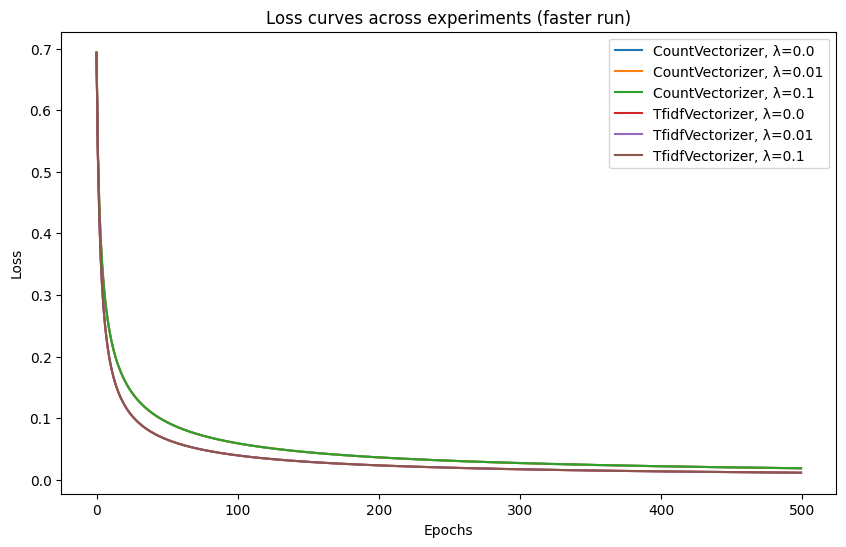

In [48]:
vectorizers = {
    "CountVectorizer": CountVectorizer(max_features=2000),   # limit features
    "TfidfVectorizer": TfidfVectorizer(max_features=2000)
}

plt.figure(figsize=(10,6))

for vec_name, vectorizer in vectorizers.items():
    # Feature extraction
    X = vectorizer.fit_transform(df['Message']).toarray()
    y = df['Category'].values.reshape(-1, 1)

    # Feature scaling
    scaler = StandardScaler(with_mean=False)
    X = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Baseline
    model = evaluate_model(X_train, X_test, y_train, y_test, vec_name, l2_lambda=0.0)
    plt.plot(model.losses, label=f"{vec_name}, λ=0.0")

    # Regularization (only 2 values instead of 3 for speed)
    for lam in [0.01, 0.1]:
        model_reg = evaluate_model(X_train, X_test, y_train, y_test, vec_name, l2_lambda=lam)
        plt.plot(model_reg.losses, label=f"{vec_name}, λ={lam}")

plt.title("Loss curves across experiments (faster run)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



#Now Use sklearn library to fit the data using logistic regression and compare results

In [50]:
# Logistic Regression using sklearn

from sklearn.linear_model import LogisticRegression

def evaluate_sklearn(X_train, X_test, y_train, y_test, vec_name, reg_strength=1.0):
    # LogisticRegression(C=1/λ) --> smaller C = stronger regularization
    model = LogisticRegression(C=reg_strength, max_iter=500, solver="lbfgs")
    model.fit(X_train, y_train.ravel())

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n===== sklearn Results ({vec_name}, C={reg_strength}) =====")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:\n", cm)

    return acc, prec, rec, f1

results = []

vectorizers = {
    "CountVectorizer": CountVectorizer(max_features=2000),
    "TfidfVectorizer": TfidfVectorizer(max_features=2000)
}

for vec_name, vectorizer in vectorizers.items():
    # Feature extraction
    X = vectorizer.fit_transform(df['Message']).toarray()
    y = df['Category'].values.reshape(-1, 1)

    # Feature scaling
    scaler = StandardScaler(with_mean=False)
    X = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Baseline (default C=1.0)
    acc, prec, rec, f1 = evaluate_sklearn(X_train, X_test, y_train, y_test, vec_name, reg_strength=1.0)
    results.append([vec_name, "C=1.0", acc, prec, rec, f1])

    # Try stronger/weaker regularization
    for C in [0.1, 10]:
        acc, prec, rec, f1 = evaluate_sklearn(X_train, X_test, y_train, y_test, vec_name, reg_strength=C)
        results.append([vec_name, f"C={C}", acc, prec, rec, f1])


import pandas as pd

results_df = pd.DataFrame(results, columns=["Vectorizer", "Regularization", "Accuracy", "Precision", "Recall", "F1"])
print("\n===== sklearn Logistic Regression Results Summary =====\n")
print(results_df)


===== sklearn Results (CountVectorizer, C=1.0) =====
Accuracy: 0.9865
Precision: 0.9786
Recall: 0.9195
F1-score: 0.9481
Confusion Matrix:
 [[963   3]
 [ 12 137]]

===== sklearn Results (CountVectorizer, C=0.1) =====
Accuracy: 0.9874
Precision: 0.9927
Recall: 0.9128
F1-score: 0.9510
Confusion Matrix:
 [[965   1]
 [ 13 136]]

===== sklearn Results (CountVectorizer, C=10) =====
Accuracy: 0.9901
Precision: 0.9792
Recall: 0.9463
F1-score: 0.9625
Confusion Matrix:
 [[963   3]
 [  8 141]]

===== sklearn Results (TfidfVectorizer, C=1.0) =====
Accuracy: 0.9874
Precision: 0.9655
Recall: 0.9396
F1-score: 0.9524
Confusion Matrix:
 [[961   5]
 [  9 140]]

===== sklearn Results (TfidfVectorizer, C=0.1) =====
Accuracy: 0.9919
Precision: 1.0000
Recall: 0.9396
F1-score: 0.9689
Confusion Matrix:
 [[966   0]
 [  9 140]]

===== sklearn Results (TfidfVectorizer, C=10) =====
Accuracy: 0.9839
Precision: 0.9396
Recall: 0.9396
F1-score: 0.9396
Confusion Matrix:
 [[957   9]
 [  9 140]]

===== sklearn Logistic 